Comparing decision stump and decision tree models
Predictions comparison (first 20 samples)
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 1, Decision Stump: 0, Decision Tree: 0
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Decision Stump: 0, Decision Tree: 1
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Decision Stump: 0, Decision Tree: 0
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 1, Decision Stump: 1, Decision Tree: 1
Actual: 0, Deci

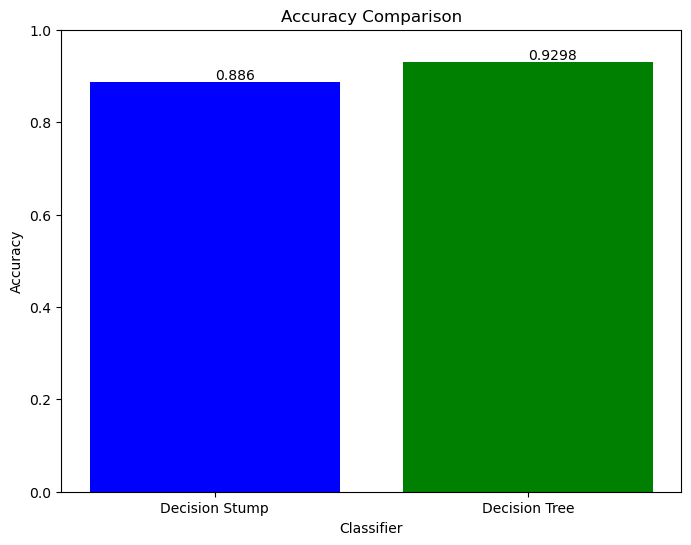

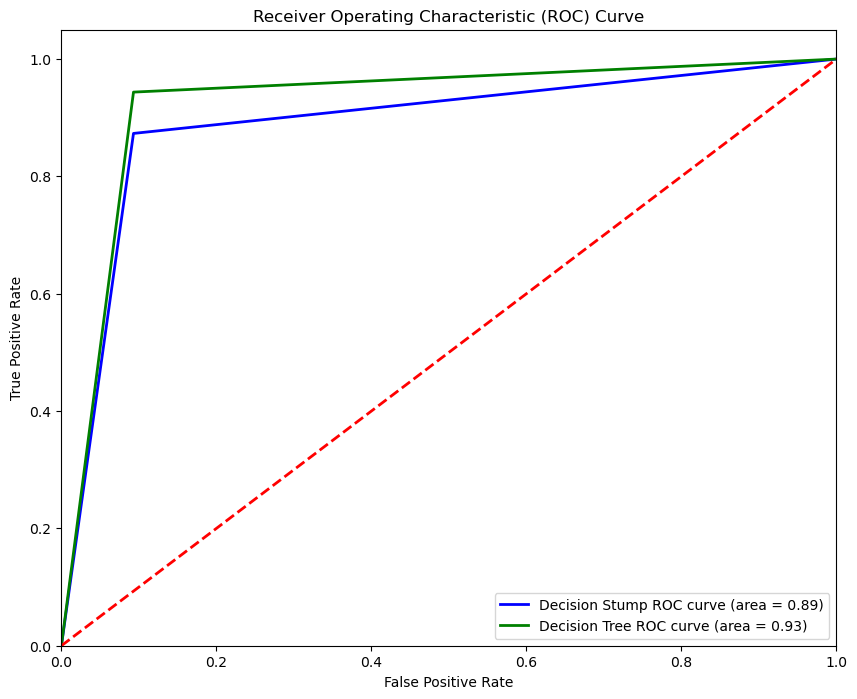

In [1]:
import sys
sys.path.insert(1, '../azlearn')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tree_model import DecisionStump
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Comparing decision stump and decision tree models")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision stump model
stump_model = DecisionStump.DecisionStump()
stump_model.fit(X_train, y_train)

# Train decision tree model (for comparison)
tree_model = DecisionTreeClassifier(random_state=35)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_stump = stump_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Print predictions comparison
print("Predictions comparison (first 20 samples)")
for i in range(min(len(y_pred_stump), 20)):
    print(f"Actual: {y_test[i]}, Decision Stump: {y_pred_stump[i]}, Decision Tree: {y_pred_tree[i]}")

# Predicted probabilities comparison
probas_stump = stump_model.predict_proba(X_test)
probas_tree = tree_model.predict_proba(X_test)
print("\nPredicted probabilities comparison (first 5 samples)")
for i in range(min(len(probas_stump), 5)):
    print(f"Decision Stump: {probas_stump[i]}, Decision Tree: {probas_tree[i]}")

# Evaluate models on the test set
accuracy_stump = accuracy_score(y_test, y_pred_stump)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("\nAccuracy comparison")
print(f"Decision Stump accuracy: {accuracy_stump:.4f}")
print(f"Decision Tree accuracy: {accuracy_tree:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
classifiers = ['Decision Stump', 'Decision Tree']
accuracies = [accuracy_stump, accuracy_tree]
bars = plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') 

plt.show()

# Plot ROC curve comparison
fpr_stump, tpr_stump, _ = roc_curve(y_test, probas_stump[:, 1])
roc_auc_stump = auc(fpr_stump, tpr_stump)
fpr_tree, tpr_tree, _ = roc_curve(y_test, probas_tree[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(10, 8))
plt.plot(fpr_stump, tpr_stump, color='blue', lw=2, label=f'Decision Stump ROC curve (area = {roc_auc_stump:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
